In [ ]:
# Задание 1

Разметим события (исходы):
D - клиент является дропом
not D - комплиментраное событие к D, клиент не является дропом
O - модель признает клиента дропом

Мы знаем из условий задачи следующие вероятности:
P(D) = 0.0002 - вероятность того, что случайно выбранный клиент - дроп
P(not D) = 1 - P(D) = 1 - 0.0002 = 0.9998 - вероятность того, что случайно выбранный клиент - добропорядочный
P(O/D) = 0.9 - вероятность обнаружения при условии, что клиент является дропом
P(O/not D) = 0.001 - вероятность обнаружения при условии, что клиент является добропорядочный


А) Необходимо найти:
 P(not D/O) - вероятность, что клиент - не дроп, но был идентифицирова как дроп.
 
 Решение:
 
 Из формулы условной вероятности:  P(not D/O) = P(O ^ not D) / P(O) = P(O/not D) * P(not D) / P(O)
 Необходимо найти вероятность обнаружения P(O)
 Исходя из формулы полной вероятности: P(O) = P(D) * P(O/D) + P(not D) * P(O/not D) = 0.0002*0.9 + 0.9998*0.001 = 0.001178
 Тогда, P(not D/O) = 0.001*0.9998/0.001178 = 0.848
 
 P(O/not D) - априорная вероятность, вероятность обнаружения при условии, что клиент является добропорядочный.  
 P(not D/O) - апостериорная вероятность,  вероятность, что клиент - не дроп, но был идентифицирова как дроп. 

Б) Необходимо найти:
 O_1 - событие, что вторая модель также признает клиента дропом.
 O_2 - событие, что после обнаружения первой моделью вторая модель также признает клиента дропом.
 P(not D/ O_2) - вероятность, что клиент - не дроп, но был идентифицирова как дроп второй моделью.
 
 Дано:
 P(O_1/D) = 0.85 вероятность обнаружения при условии, что клиент является дропом
 P(O_1/ not D) = 0.02вероятность обнаружения при условии, что клиент не является дропом
 
 Решение:
 
 Из формулы условной вероятности:  P(not D/O_2) =  P(O2/ not D) * P(O/not D) * P(not D) / P(O_2)
 Необходимо найти вероятность обнаружения P(O_2)
 P(O_2) = P(D) * P(O/D) * P(O_1/D) + P(not D) * P(O/not D) * P(O_1/not D) =0.0002*0.9*0.85 + 0.9998*0.001*0.02 = 0.00017296
 
 P(not D/O_2) = 0.02 * 0.001 * 0.9998 / 0.00017296 = 0.115

In [49]:
import random

In [83]:
# количество симуляций
n = 10000000
# вероятность, что клиент - дроп
is_drop = 0.0002
# вероятность вычислить дроп среди дропов
true_pos = 0.9
# вероятность вычислить дроп среди благонадежных
false_pos = 0.001
# вероятность вычислить дроп среди дропов у второй модеи
true_pos_2 = 0.85
# вероятность вычислить дроп среди благонадежных у второй модеи
false_pos_2 = 0.02

In [64]:
def simulation_a(is_drop: float, true_pos: float, false_pos: float, n: int = 10000) -> float:
    """
    Функция для симулирования задачи А с помощью Монте - Карло
    """
    tp = 0 # true positives
    fp = 0 # false positives
    # симуляция монте-карло
    for i in range(0,n):
        # рандомное значение в интервале [0,1] сравнивается с вероятностью дропа
        if random.random() <= is_drop:
            # если дроп, то симулируется как оценит его система 
            if random.random() <= true_pos:
                tp += 1
        else:
            # симулирование на ложное срабатывание системы
            if random.random() <= false_pos:
                fp += 1
    return 1- tp / (tp + fp) # 1 - precision

In [65]:
print(simulation_a(is_drop, true_pos, false_pos, n))

0.8468653823264355


In [84]:
def simulation_b(is_drop: float, true_pos: float, false_pos: float, true_pos_2: float, false_pos_2: float, n: int = 10000) -> float:
    """
    Функция для симулирования задачи Б с помощью Монте - Карло
    """
    tp = 0
    fp = 0
    for i in range(0,n):
        if random.random() <= is_drop:
            # К TP прибавляется один, если обе модели распознали дроп как дроп
            if (random.random() <= true_pos) & (random.random() <= true_pos_2):
                tp += 1
        else:
            # К FP прибавляется один, если обе модели распознали не дроп как дроп
            if (random.random() <= false_pos) & (random.random() <= false_pos_2):
                    fp += 1
    return 1- tp / (tp + fp)

In [85]:
print(simulation_b(is_drop, true_pos, false_pos, true_pos_2, false_pos_2, n))

0.11970217640320735


In [ ]:
# Задание 2

In [ ]:
# Часть A

In [194]:
import pandas as pd
# selenium для парсинга сайтов, у меня, к сожалению, не получилось парсить с помощью requests
from selenium import webdriver 
# Библиотека для поиска данных в html файле
from bs4 import BeautifulSoup
import json
import collections.abc as coll

In [101]:
# количество страниц для итерирования
n_pages = 110

In [262]:
import time

In [308]:
# необходимо получить ID строящихся домов
soups = [] # лист с частями html file, содержащих информцию определенного класса
ids = [] # лист с ID
# класс HTML, содержащий ID
CLASS_ID = 'styles__Ellipsis-sc-1fw79ul-0 jYMONF styles__Value-sc-1ajig0k-5 styles__IdValue-sc-1ajig0k-17 lodXzE jTBlso' 
browser = webdriver.Chrome() # открытие браузера селениумом
for i in range(0, n_pages): # итарирование через страницы
    # url страницы 
    url_iter = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/%D0%BA%D0%B0%D1%82%D0%B0%D0%BB%D0%BE%D0%B3-%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BA/%D1%81%D0%BF%D0%B8%D1%81%D0%BE%D0%BA-%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2/%D1%81%D0%BF%D0%B8%D1%81%D0%BE%D0%BA?objStatus=0&page={i}&limit=100'
    browser.get(url_iter)
    time.sleep(5)
    # html файл
    src = browser.page_source
    # парсинг html файла
    soup = BeautifulSoup(src, 'html.parser')
    # класс и соответствующие ID
    soups.append(soup.find_all('span', {'class': CLASS_ID}))
# 1-d  лист
soups_flat = [item for sublist in soups for item in sublist]
# изъятие текстового значения
for s in soups_flat:
    ids.append(s.get_text().replace("ID дома: ",''))
# удаление дупликатов
ids = set(ids)
# закрытие браузера
browser.close()

In [309]:
len(ids)

10962

In [311]:
Id = [] #  ID
region = [] #  регионы
price = [] #  цены за кв. метр
floors = [] #  этажи
rooms = [] # комнаты
parking = [] # количество парковочных мест
square = [] # площадь 
date_exp = [] # дата сдачи объекта
obj_class = [] # класс жилья
browser = webdriver.Chrome() # открытие браузера
for objId in ids:
    # url, страничка объекта
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{int(objId)}'
    browser.get(url)
    source = browser.page_source
    # парсинг html файла
    soup = BeautifulSoup(source, 'html.parser')
    # перевод текстового документа в json
    js_data = json.loads(soup.text).get('data')
    # На каждой итерации добавляется соотств. элементы в лист
    Id.append(js_data['id'])
    region.append(js_data['region'])
    # если пропуск, то заполняем его как None
    try:
        price.append(js_data['objPriceAvg'])
    except:
        price.append(None)
    try:
        floors.append(js_data['floorMax'])
    except:
        floors.append(None)
    try:
        rooms.append(js_data['objElemLivingCnt'])
    except:
        rooms.append(None)
    try:
        parking.append(js_data['objElemParkingCnt'])
    except:
        parking.append(None)
    try:
        square.append(js_data['objSquareLiving'])
    except:
        square.append(None)
    try:
        date_exp.append(js_data['objReady100PercDt'])
    except:
        date_exp.append(None)
    try:
        obj_class.append(js_data['objLkClassDesc'])
    except:
        obj_class.append(None)
browser.close()
# cловарь с листами
data = {
    'ID': Id,
    'region': region,
    'price': price,
    'floors': floors,
    'rooms': rooms,
    'parking': parking,
    'square': square,
    'date_exp': date_exp,
    'obj_class': obj_class
}
# создание датафрейма
df = pd.DataFrame(data)



In [314]:
df

,ID,region,price,floors,rooms,parking,square,date_exp,obj_class
0,43134,77,393881.0,33,239,162,21851.30,2025-03-31,Элитный
1,43944,23,212028.0,9,202,0,11071.90,2023-12-31,Бизнес
2,44541,54,NaN,2,1,0,59.80,2024-09-30,Типовой
3,49360,77,386858.0,23,910,411,63798.80,2025-12-31,Элитный
4,48707,2,124486.0,6,80,0,3081.12,2025-12-31,Комфорт
...,...,...,...,...,...,...,...,...,...
10957,46061,63,79579.0,17,135,0,7109.10,2024-12-31,Типовой
10958,53127,78,440000.0,16,577,0,31015.00,2025-12-31,Бизнес
10959,32190,24,51614.0,18,131,0,12045.59,2026-03-31,Бизнес
10960,48388,59,NaN,25,308,0,16646.20,2032-03-31,Комфорт


In [ ]:
# Часть B

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

In [316]:
df.info() # пропуски лишь только в цене 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10962 entries, 0 to 10961
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         10962 non-null  int64  
 1   region     10962 non-null  int64  
 2   price      7577 non-null   float64
 3   floors     10962 non-null  int64  
 4   rooms      10962 non-null  int64  
 5   parking    10962 non-null  int64  
 6   square     10962 non-null  float64
 7   date_exp   10962 non-null  object 
 8   obj_class  10962 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 770.9+ KB


In [319]:
# аггрегирование по регионам с подсчетом средней цены за кв. метр
grouped_df_price = df[['region', 'price']].\
    groupby('region').\
    agg('mean').\
    sort_values('price').\
    reset_index().\
    rename(columns = {'price': 'avg_price'}).\
    dropna()
    
grouped_df_price

,region,avg_price
0,5,39684.200000
1,20,42786.500000
2,7,49913.000000
3,44,51497.962264
4,8,56813.250000
...,...,...
76,65,142076.125000
77,23,145604.180180
78,41,185694.000000
79,78,192133.449086


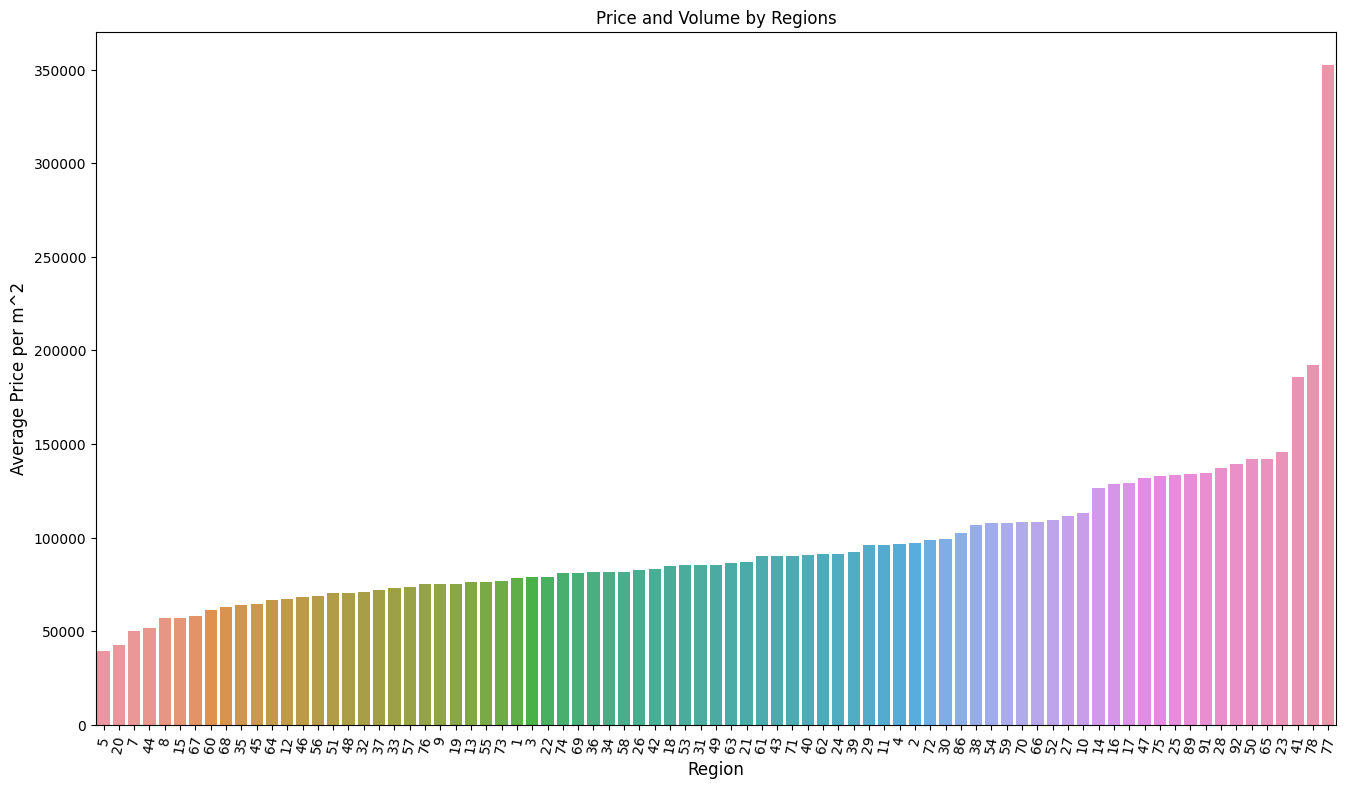

In [352]:
plt.figure(figsize=(16, 9)) 
fig = sns.barplot(data = grouped_df_price, x='region', y='avg_price', order=grouped_df_price['region'])
plt.tick_params(axis='x', rotation=80)
fig.set_xlabel('Region', size = 12)
fig.set_ylabel('Average Price per m^2', size = 12)
plt.title("Price and Volume by Regions")
plt.show()
# Можно видеть, что средняя цена за кв. м. в 77 (Москва) значительно превышает цену в остальных регионах.
# На 2 и третьем месте Санкт-Петербург (78) и Камчатка 41
# Самый дешевый средний кв. метр находится на Юге Росиии (Дагестан(5), Чечня(20), Кабардино-Балкария(7))

In [321]:
# Объемы вводимого жилья по годам и регионам
df['year'] = df['date_exp'].apply(lambda x: x.split('-')[0])
volume_reg_df = df.value_counts(['region']).reset_index()
volume_year_df = df.value_counts(['year']).reset_index()
print(volume_reg_df, volume_year_df)

    region  count
0       23   1086
1       77    882
2       50    695
3       78    562
4       54    532
..     ...    ...
78      49      7
79       9      6
80       6      4
81      51      1
82      79      1

[83 rows x 2 columns]     year  count
0   2024   4199
1   2025   2743
2   2023   2646
3   2026    890
4   2027    277
5   2028    127
6   2029     21
7   2030     18
8   2031     18
9   2032      7
10  2036      4
11  2022      4
12  2033      4
13  2038      1
14  2020      1
15  2034      1
16  2039      1


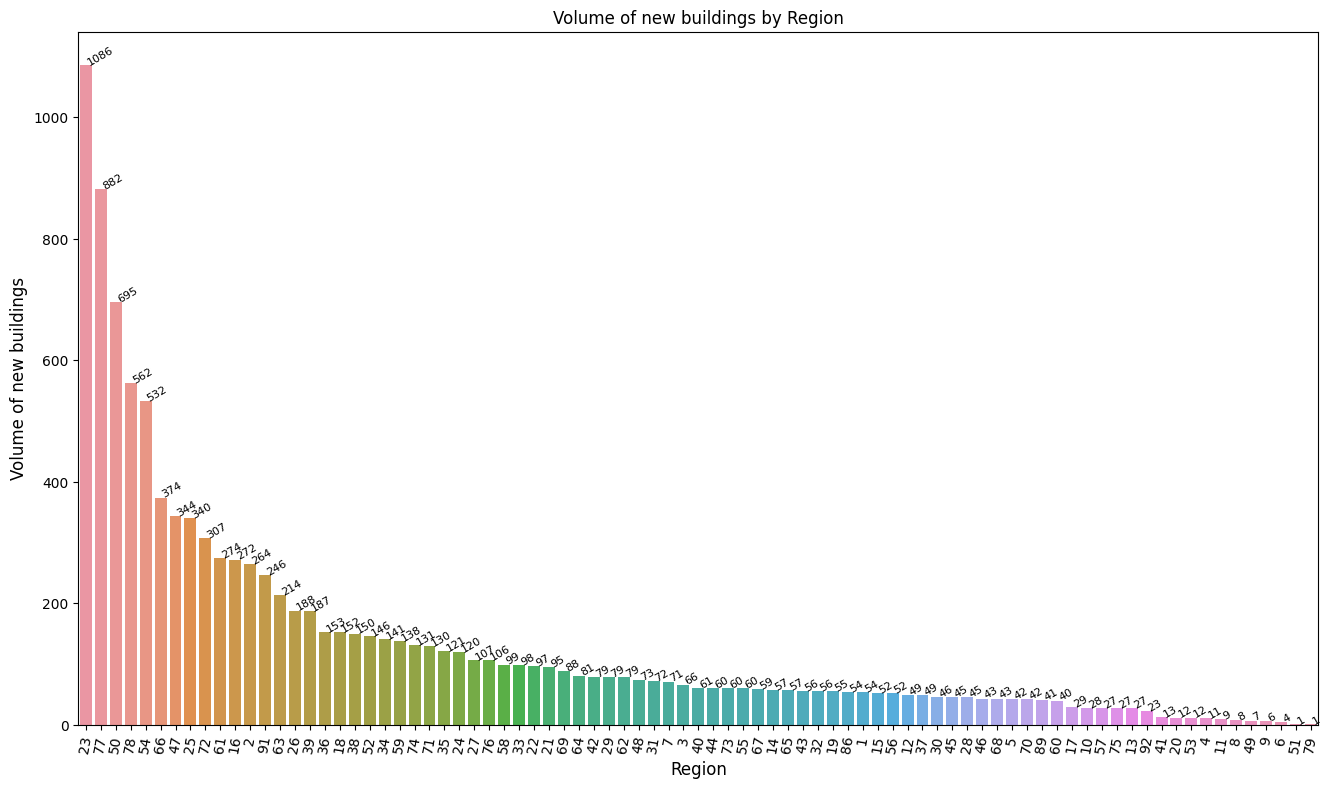

In [344]:
plt.figure(figsize=(16, 9)) 
sns.barplot(data = volume_reg_df, x='region', y='count', order=volume_reg_df['region'])
plt.tick_params(axis='x', rotation=80)
for x, y in enumerate(volume_reg_df['count']):
    plt.text(x, y, str(y), rotation=30,  size=8)
plt.xlabel('Region', size = 12)
plt.ylabel('Volume of new buildings', size = 12)
plt.title("Volume of new buildings by Region")
plt.show()
# В сибирских и дальневосточных регионах планируется построить в среднем не более 50 домов на регион в ближайшие годы.
# Краснодарский край является лидером по количеству планируемого объема жилья, дальше идет Москва,Московская обл. и Питер. 

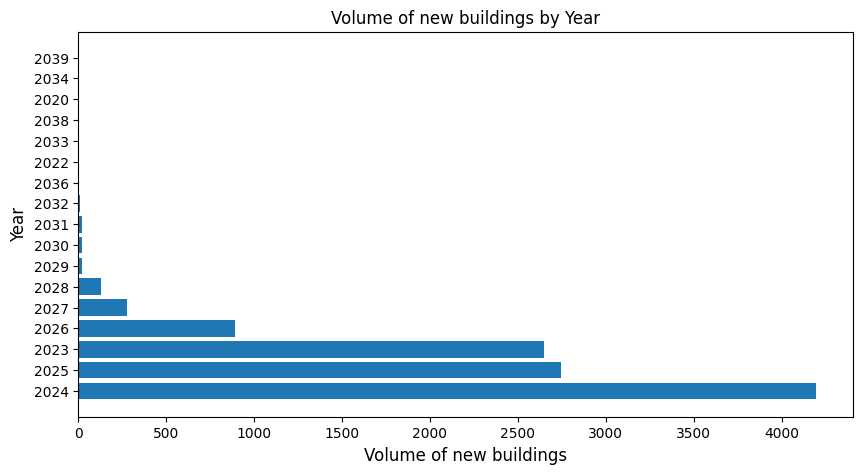

In [387]:
plt.figure(figsize=(10, 5)) 
plt.barh(volume_year_df['year'], volume_year_df['count'])
plt.ylabel('Year', size = 12)
plt.xlabel('Volume of new buildings', size = 12)
plt.title("Volume of new buildings by Year")
plt.show()
# Большую часть нового жилья стоит ожидать в ближайшие 2 года.

In [354]:
# средние значения по регионам
agg_func = {
    'price': 'mean',
    'floors': 'mean',
    'rooms': 'mean',
    'parking': 'mean',
    'square': 'mean',
    'count': 'sum'
}
df['count'] = 1
df_grouped = df[['region', 'price', 'floors', 'rooms', 'parking', 'square', 'count']].groupby('region').agg(agg_func).reset_index()
df_grouped = df_grouped.query('count > 10')
df_grouped = df_grouped.dropna().\
    reset_index(drop=True)

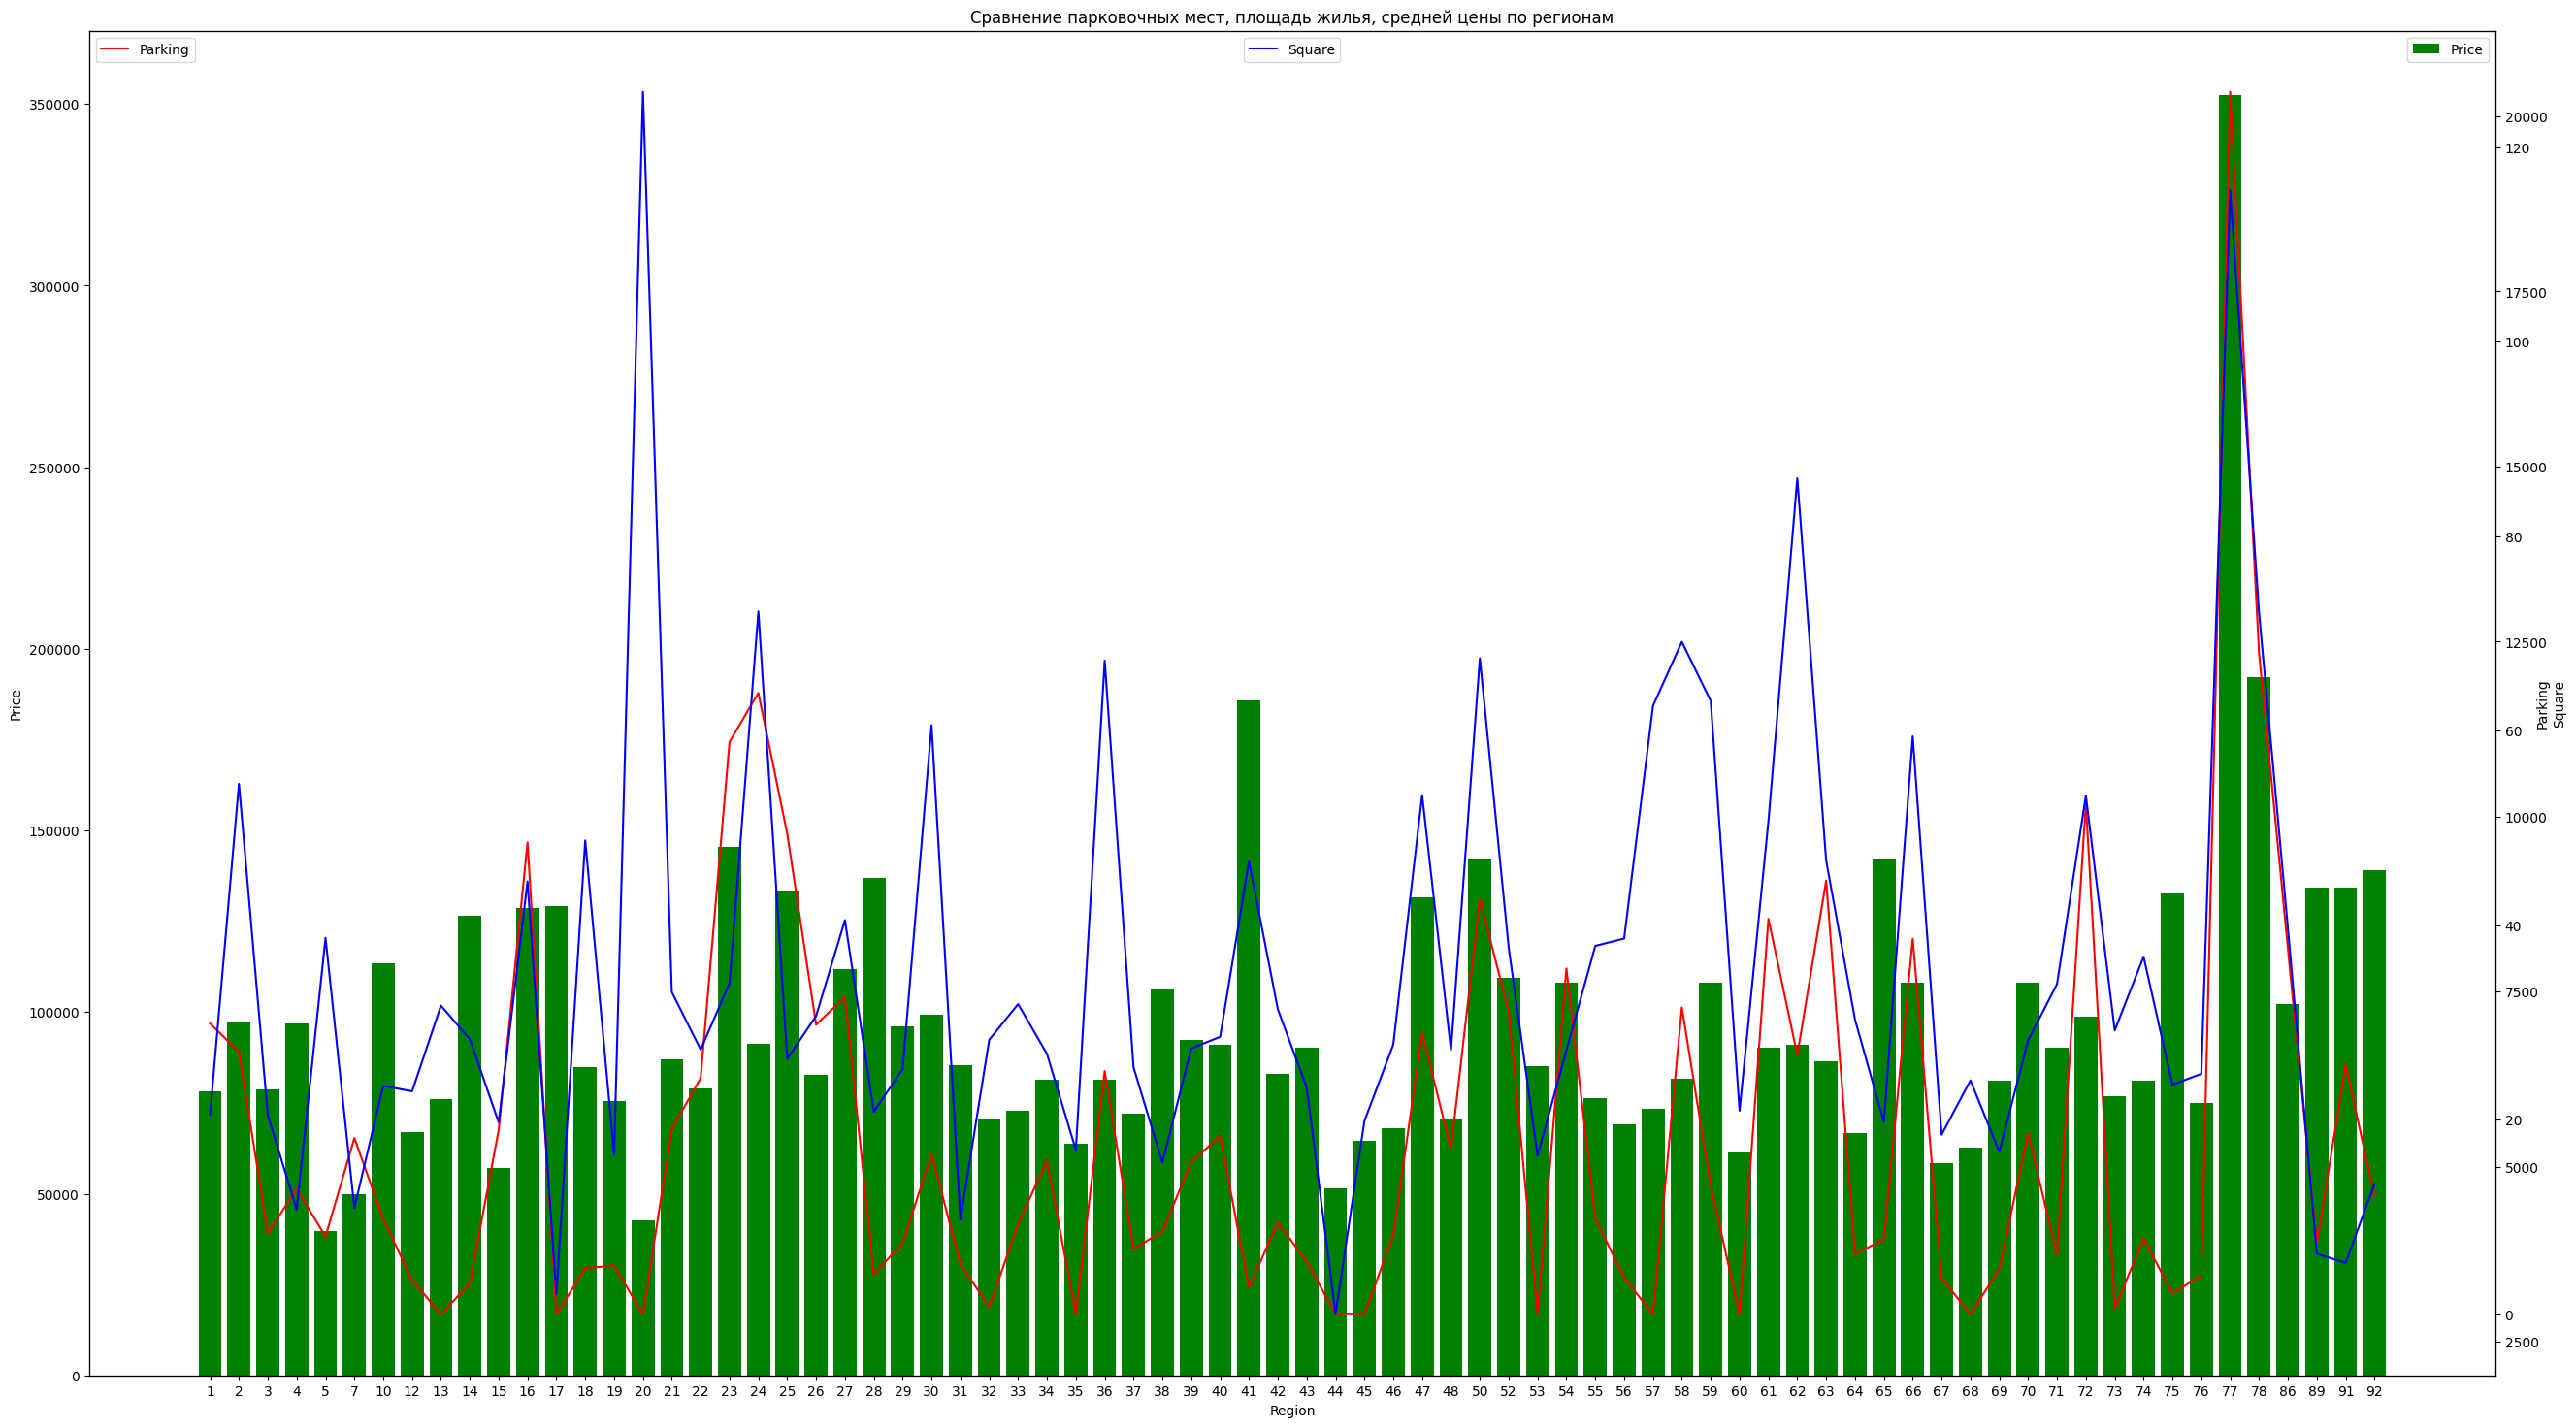

In [357]:
fig, ax = plt.subplots(figsize=(32,18))
ax_1 = ax.twinx()
ax_2 = ax.twinx()
df_grouped['region'] = df_grouped['region'].astype('str')
ax.bar(df_grouped['region'], df_grouped['price'],  color ='green', label='Price')
ax_2.plot(df_grouped['region'], df_grouped['square'],  color ='blue', label='Square')
ax_1.plot(df_grouped['region'], df_grouped['parking'],  color ='red', label='Parking')
ax.set_xlabel('Region')
ax.set_ylabel('Price')
ax_1.set_ylabel('Parking')
ax_2.set_ylabel('Square')
ax.legend()
plt.title('Сравнение парковочных мест, площадь жилья, средней цены по регионам')
ax_1.legend(loc='upper left')
ax_2.legend(loc='upper center')
plt.show()
# Заметно, что в Чечне (20) в среднем самая большая жил. площадь при этом самая низкая цена жилья и количество парковочных мест.
# Также аномалия на Камчатке, где количество парковочных мест довольно мало при относительно большой средней жил. площади.
# При довольно умеренной цене за кв. метр в Рязани (62) площадь жилья довольно большая.

In [358]:
import numpy as np

In [359]:
# функция для построения линейной регресиии
def poly_f(x,y):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    y_fit = polynomial(x)
    return y_fit

In [360]:
# функция для построения грфаика оценки зависимости величин
def scat_plot(data: pd.DataFrame, x: str, y:str):
    sns.scatterplot(data=data, x=x, y=y)
    plt.plot(data[x], poly_f(data[x], data[y]))

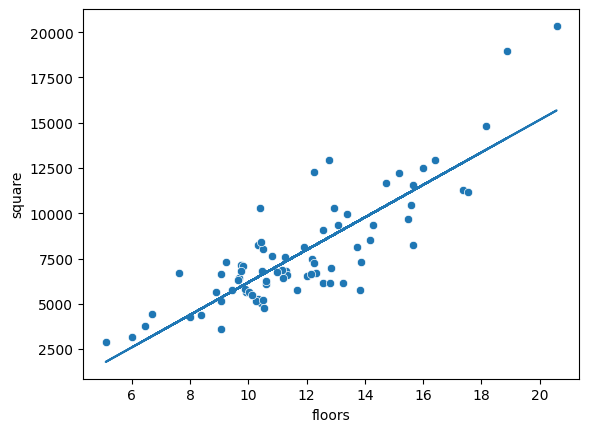

In [361]:
scat_plot(data=df_grouped, x='floors', y='square')
# Есть сильная положительная линейная зависимость между количеством этажей и жил. площадью 

Text(0.5, 0, 'Nember of new buildings')

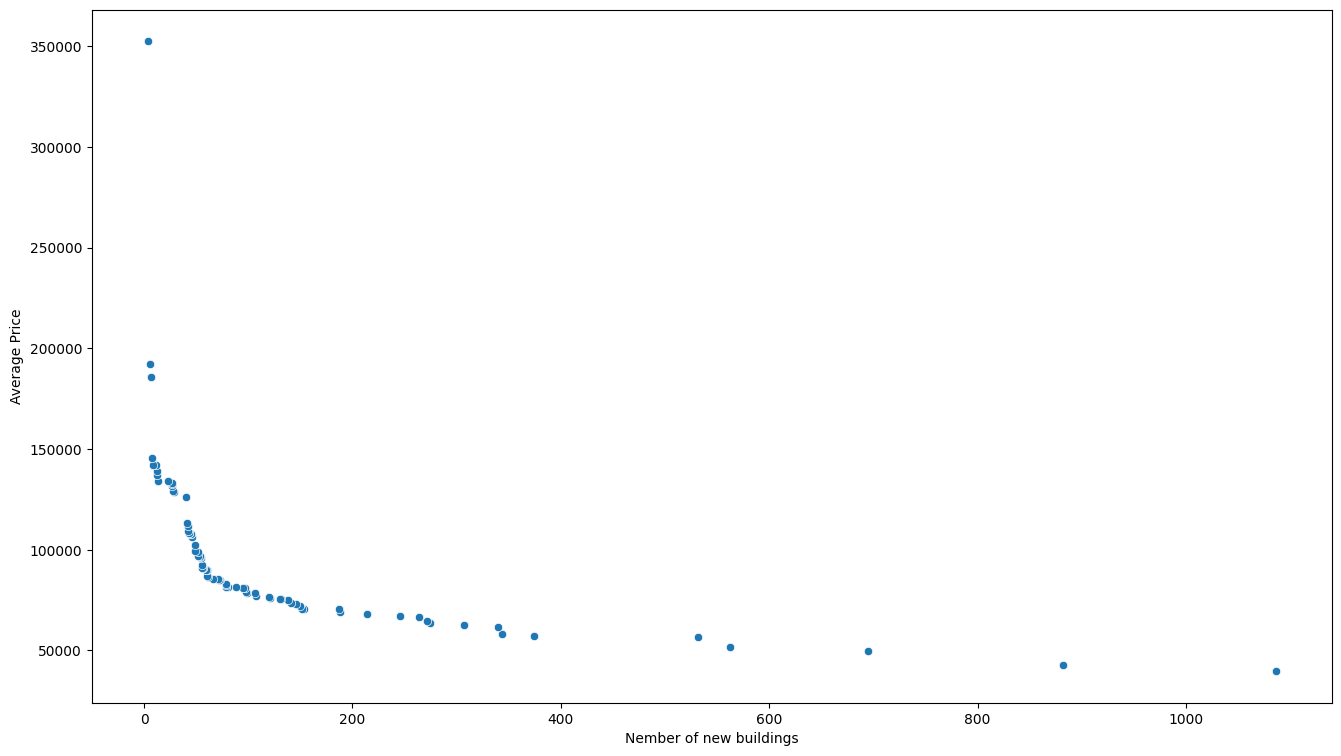

In [371]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x=volume_reg_df['count'], y=grouped_df_price['avg_price'])
plt.ylabel("Average Price")
plt.xlabel("Nember of new buildings")
# Можно видеть кривую спроса и предложения. Чем выше цена, тем меньше нового вводимого жилья. Однако из предыдущего графика понятно, что Москва - исключение

<Axes: xlabel='obj_class', ylabel='floors'>

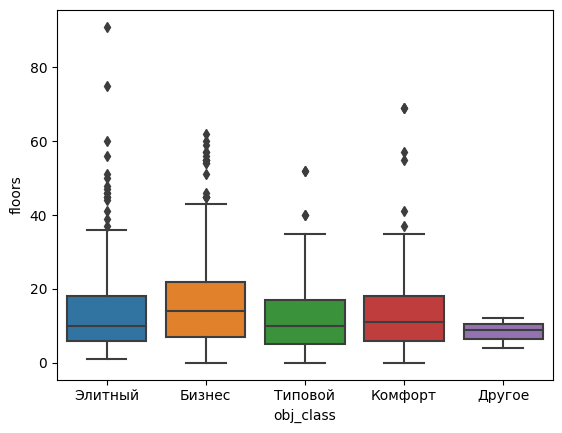

In [363]:
sns.boxplot(data=df, x='obj_class', y='floors')
# Различий в распределении количества этажей в типовом и комфорте и элитном практически нет.

<Axes: xlabel='obj_class', ylabel='price'>

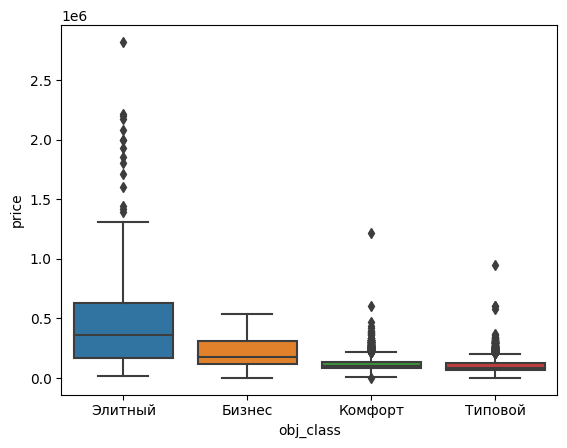

In [367]:
sns.boxplot(data=df.query('price.isna() == False'), x='obj_class', y='price')
# Как и следовало ожидать, медиана и 75 квартиль цены за кв. метр в элитном жилье значительно выше чем в типовом и комфорте.
# Различия же типового и комфорта минимальны

In [ ]:
# Задание 3

In [389]:
import findspark
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, IntegerType
import pyspark.sql.functions as F

In [ ]:
# создание Сессии
findspark.init()
spark = SparkSession.builder.getOrCreate()

In [38]:
# Схема типов данных
csv_schema = StructType([StructField('event_dt', TimestampType(), True), StructField('user_id', StringType(), True), StructField('trans_amount', IntegerType(), True)])
trans_events = spark.read.format("csv").option("header","true").schema(csv_schema).load('trans_events.csv')
# Создание временной таблицы
trans_events.createOrReplaceTempView('trans_events_view')

In [39]:
spark.sql("""
    WITH sub AS (
        SELECT *,
            event_dt - INTERVAL 24 HOURS AS cut_off
        FROM trans_events_view
    )
    SELECT 
    sub.event_dt,
    sub.user_id,
    SUM(tr.trans_amount ) AS cum_sum
    FROM trans_events_view AS tr
    JOIN sub
    ON tr.user_id = sub.user_id
        AND tr.event_dt > sub.cut_off
        AND tr.event_dt <= sub.cut_off + INTERVAL 24 HOURS
    GROUP BY 1, 2
    ORDER BY user_id, event_dt
""").show()

+-------------------+----------+-------+
|           event_dt|   user_id|cum_sum|
+-------------------+----------+-------+
|2022-10-01 13:54:25|3qw4gtd90o|   2924|
|2022-10-01 14:52:34|3qw4gtd90o|   5587|
|2022-10-01 16:25:11|3qw4gtd90o|   7361|
|2022-10-02 14:08:09|3qw4gtd90o|   4907|
|2022-10-02 17:33:18|3qw4gtd90o|   1477|
|2022-10-03 12:21:55|3qw4gtd90o|   4536|
|2022-10-03 12:52:44|3qw4gtd90o|   6483|
|2022-10-03 14:39:04|3qw4gtd90o|   8878|
|2022-10-03 17:43:16|3qw4gtd90o|   8179|
|2022-10-01 14:57:03|45xyqxzeok|   1953|
|2022-10-01 16:31:36|45xyqxzeok|   2913|
|2022-10-01 17:10:07|45xyqxzeok|   5405|
|2022-10-01 17:29:04|45xyqxzeok|   7152|
|2022-10-02 18:01:45|45xyqxzeok|    715|
|2022-10-02 18:18:25|45xyqxzeok|   1362|
|2022-10-02 21:41:19|45xyqxzeok|   3599|
|2022-10-02 21:56:42|45xyqxzeok|   6654|
|2022-10-03 13:27:26|45xyqxzeok|   8943|
|2022-10-03 13:31:04|45xyqxzeok|  10119|
|2022-10-03 22:22:29|45xyqxzeok|   5129|
+-------------------+----------+-------+
only showing top

In [42]:
sub_df = trans_events.withColumn('cut_off', F.col('event_dt') - F.expr("INTERVAL 24 hours")).\
    withColumnRenamed('trans_amount', 'new_amount')
sub_df = sub_df.withColumnRenamed('event_dt', 'event_dt_new')

condition =[trans_events.user_id == sub_df.user_id, trans_events.event_dt > sub_df.cut_off, trans_events.event_dt <= sub_df.cut_off + F.expr("INTERVAL 24 hours")]
df_joined = trans_events.join(sub_df, condition, how='inner').\
    drop(trans_events.user_id).\
    groupBy(['event_dt_new', 'user_id']).\
    agg(F.sum(F.col('trans_amount')).alias('cum_sum')).\
    orderBy(['user_id', 'event_dt_new'])
df_joined.show()

+-------------------+----------+-------+
|       event_dt_new|   user_id|cum_sum|
+-------------------+----------+-------+
|2022-10-01 13:54:25|3qw4gtd90o|   2924|
|2022-10-01 14:52:34|3qw4gtd90o|   5587|
|2022-10-01 16:25:11|3qw4gtd90o|   7361|
|2022-10-02 14:08:09|3qw4gtd90o|   4907|
|2022-10-02 17:33:18|3qw4gtd90o|   1477|
|2022-10-03 12:21:55|3qw4gtd90o|   4536|
|2022-10-03 12:52:44|3qw4gtd90o|   6483|
|2022-10-03 14:39:04|3qw4gtd90o|   8878|
|2022-10-03 17:43:16|3qw4gtd90o|   8179|
|2022-10-01 14:57:03|45xyqxzeok|   1953|
|2022-10-01 16:31:36|45xyqxzeok|   2913|
|2022-10-01 17:10:07|45xyqxzeok|   5405|
|2022-10-01 17:29:04|45xyqxzeok|   7152|
|2022-10-02 18:01:45|45xyqxzeok|    715|
|2022-10-02 18:18:25|45xyqxzeok|   1362|
|2022-10-02 21:41:19|45xyqxzeok|   3599|
|2022-10-02 21:56:42|45xyqxzeok|   6654|
|2022-10-03 13:27:26|45xyqxzeok|   8943|
|2022-10-03 13:31:04|45xyqxzeok|  10119|
|2022-10-03 22:22:29|45xyqxzeok|   5129|
+-------------------+----------+-------+
only showing top

In [ ]:
# Задание 4

А) Precision = 0.21, Recall = 0.85, Довольно высокое значение полноты означает, что модель обнаружила 85% мошеннических операций среди всех мошеннических операций. Однако, довольно низкое значение точности означает, что модель определяет лишь 21% реальных мошеннических операций среди всех операций, определенных моделью как мошеннические. 
Низкое значение точности по сравнению с полнотой не так страшно, так как с точки зрения логики лучше выявить как можно больше мошеннических операций (за это отвечает полнота) и при этом выявить при обзвоне клиента малое количество реальных мошеннических операций и потревожить клиента. Поэтому, низкий precision не так опасен как низкий recall.
С другой стороны, можно сравнивать модели между собой по метрике f1 (среднем гормоническом полноты и точности), так мы заинтересованы в росте полноты и точности одновременно, однако стоит также подобрать вес пропорции betta, так как recall важнее precision. 

Б) Нагрузка на операторов - это количество операций, помеченных как мошеннические: нагрузка = TP + FP, количество мошенн. операций 2000 = TP + FN
Найдем количество правильно определенных мошеннических операций TP = recall*(TP + FN) = 0.85*2000 = 1700
найдем нагрузку нагрузка = TP/precision = 1700/0.21 = 8095


В) В таком случае с точки зрения безопасности клиентов лучше отнести данную транзакцию к ложноположительному результату. Тогда при оценки эффективности модели ухудшиться лишь точность, которая имеет меньшую значимость в данном случае чем полнота. При использовании данной транзакции в дообучении модели, можно обучать модель с учетом, что транзакция - мошенническая, в следствие это, увеличится общее количество транзакций, которые будут определяться моделью как мошеннические.

Г) Со временем  можно попробовать получить более достоверную информацию о потенциальных мошеннических тразакциях(клиент не отвечал на телефон), но со временем дал обратную связь и переобучить модель. Возможно, что нагрузка на операторов (8095) звонков является сильно большой и для этого можно "пожертвовать"  полнотой модели и попробовать увеличить точность, тогда можно будет снизить нагрузку на операторов. 

In [ ]:
# Задание 5

А) 
-метрика accuracy не подходит, так как выборки несбалансированы и ,следственно, этот факт повлияет на метрику
-recall, метрика учитывает процент распознаваемого fraud от общего числа fraud - транзакций, но она не учитывает насколько точно распознается fraud, поэтому используется вместе с precision
-precision, точность распознавания fraud из всех операций, которые распознаются как fraud, не учитывет процент распознаваемого fraud от общего числа fraud
-AUC, площадь под кривой ROC, проблема заключается в том, что необходимо нетолько смотреть на значение площади AUC, а также на крутизну самой кривой (кривая должна быть вытянута в сторону TPR), не так хорошо интепретируем как точность и полнота.

Эти метрики стоит использовать:
-f1, среднее гармоническое между recall и precision. Можно оценивать модели по одной метрике. Также можно настраивать вес для оценки влияния recall и precision. 
-TNR, доля ложных срабатываний системы. Количество добросовестных пользователей, которых система распознала как мошенников. 

Б) 
-Метрика оценивающая, среднюю скорость срабатывания системы (время необходимое, для прогнозирования и выыода результата)
-Процент предотвращенных мошеннических транзакций
-Изменение мошеннических операций по месяца/дням